
**1.Data collection**

**2.Data Cleaning & Preprocessing(tf dataset & data augmentation - we use it because we may not have enough diverse set of images so we will rotate,flip,change contrast of images so we get more training samples)**

**3.Model Building(using CNN)**



In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


# **1. Data Collection**

In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/grive/MyDrive/practice/PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

=>Every element in dataset is a batch of 32 images so we get length of dataset as 68 where last element may contain less than 32 images.

In [7]:
len(dataset)

68

In [8]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 2 0 0 1 1 1 1]


In [9]:
#print first image among all the 32 images in 1 batch(in tensor)
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[152. 145. 152.]
  [150. 143. 150.]
  [150. 143. 150.]
  ...
  [155. 150. 157.]
  [151. 146. 153.]
  [148. 143. 150.]]

 [[152. 145. 152.]
  [151. 144. 151.]
  [150. 143. 150.]
  ...
  [159. 154. 161.]
  [156. 151. 158.]
  [154. 149. 156.]]

 [[153. 146. 153.]
  [151. 144. 151.]
  [151. 144. 151.]
  ...
  [162. 157. 164.]
  [161. 156. 163.]
  [159. 154. 161.]]

 ...

 [[ 96.  86.  94.]
  [ 89.  79.  87.]
  [ 99.  89.  97.]
  ...
  [ 89.  83.  87.]
  [119. 113. 117.]
  [ 76.  70.  74.]]

 [[104.  94. 102.]
  [ 86.  76.  84.]
  [ 82.  72.  80.]
  ...
  [ 54.  48.  52.]
  [110. 104. 108.]
  [ 93.  87.  91.]]

 [[ 91.  81.  89.]
  [ 68.  58.  66.]
  [ 58.  48.  56.]
  ...
  [143. 137. 141.]
  [130. 124. 128.]
  [ 98.  92.  96.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
#print first image among all the 32 images in 1 batch(converted to numpy)
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[163. 156. 164.]
  [170. 163. 171.]
  [168. 161. 169.]
  ...
  [162. 158. 172.]
  [160. 156. 170.]
  [161. 157. 171.]]

 [[161. 154. 162.]
  [167. 160. 168.]
  [166. 159. 167.]
  ...
  [166. 162. 176.]
  [163. 159. 173.]
  [163. 159. 173.]]

 [[161. 154. 162.]
  [166. 159. 167.]
  [164. 157. 165.]
  ...
  [167. 163. 177.]
  [166. 162. 176.]
  [166. 162. 176.]]

 ...

 [[103.  91. 101.]
  [108.  96. 106.]
  [114. 102. 112.]
  ...
  [107.  96. 110.]
  [106.  95. 109.]
  [108.  97. 111.]]

 [[103.  91. 101.]
  [109.  97. 107.]
  [110.  98. 108.]
  ...
  [112. 101. 115.]
  [108.  97. 111.]
  [109.  98. 112.]]

 [[101.  89.  99.]
  [106.  94. 104.]
  [104.  92. 102.]
  ...
  [108.  97. 111.]
  [107.  96. 110.]
  [110.  99. 113.]]]


=>Every number is represented between 0 to 255 in above(3D array) as colour is represented between number 0 to 255.

In [11]:
#print shape of 1st image
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


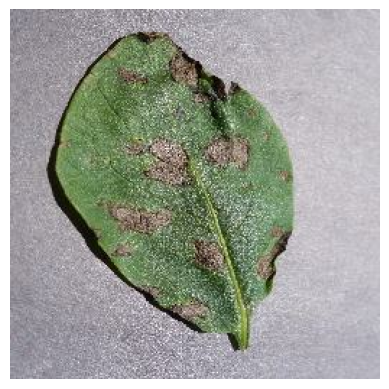

In [12]:
#visualise images(imshow expects a 3D array)
#as we have added shuffle mode everytime we see different image
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.axis("off")

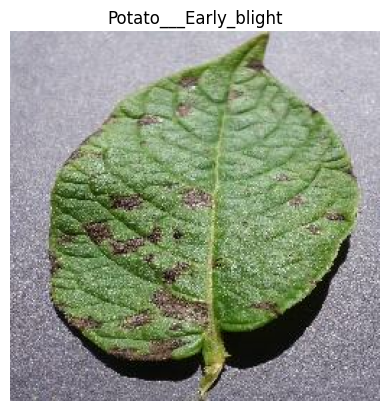

In [13]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

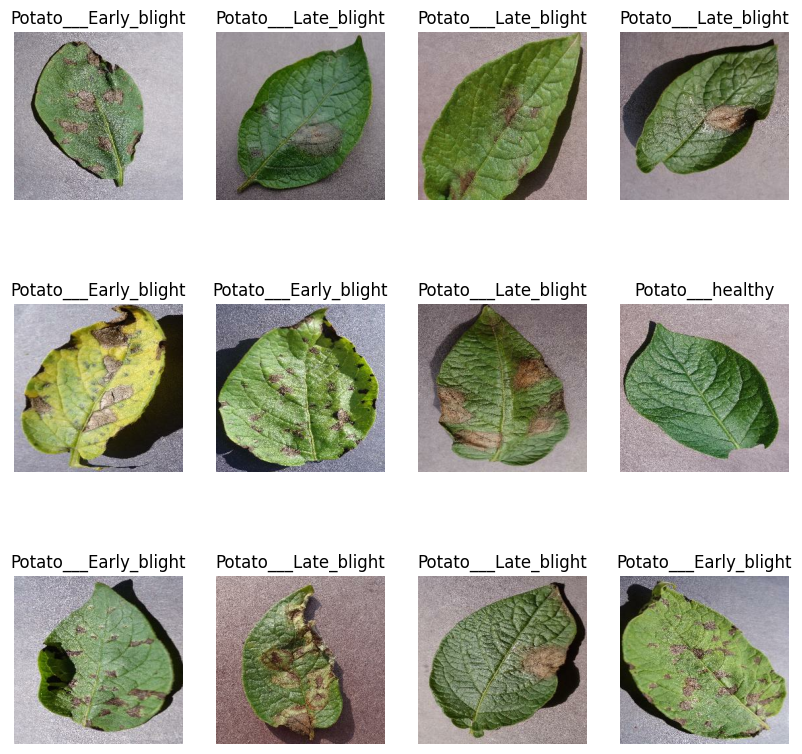

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [15]:
len(dataset)

68

=>Now split our dataset into train and test

train - 80% of data
test - 10% of data
validation - 10% of data

=>during training process we will use validation set after each epoch we will do the validation using the above validation set

=>after completing all the epochs and went to the final model then we use test set to measure the accuracy of the model before deploying it

In [16]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [17]:
#let's take first 54 batches as a training dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [18]:
#skipping first 54 batches and getting remaining all batches
test_ds = dataset.skip(54)
len(test_ds)

14

In [19]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [20]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

8

=>Above splitting is hard coded, the same will be done by below python function

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=10)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [23]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

=> cache will read the image from the disk and for the next iteration when we need the same image it will keep that image in the memory so this will improve performance

=> if we are using cpu and gpu then if gpu is busy in training then prefetch(CPU) will load next set of batch from your disk so this will improve performance

In [27]:
 #we are letting tensorflow to determine how many batches to load while gpu is training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# **2. Preprocessing**

=>The first step in image processing is scale

=> we are doing rescaling by using below API

=> image with value 255 will be rescaled to 1.0

=>we will supply this layer(resize_and_rescale layer) when we actually build our model

=>we will resize every image to 256* 256 because this layer will go to trained model and during prediction if we give any image of whose size is not equal to 256*256 then the below will take care of resizing it.

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), #resize every image to 256*256
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

=>after creating above layer now we will do the data augmentation to make our model robust

=>if we train a model using some images and when we try predicting a image which is rotated or which is different in a contrast then our model will not perform better so for that reason we use the concept of data augmentation

=>In data augmentation we will be creating some new training samples from our image by applying different transformations like horizontal flip, contrast, rotation, zoom,.. and now we will use all the transformed and original images for training

=>here we are using randomflip and some rotation so below is data augmentation layer

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# **3. Build the model**

using CNN

## **Neural Network Architecture**

=> 1st layer is resize and rescale

=> 2nd layer is data augmentation

=> 3rd layer is convolutional layer with 32 layers(with trail and error), filter size of 3*3, the popular activation layer for hidden layers is always relu because it is very fast to compute

=> 4th layer is max pooling layer of size 2*2

=>By doing some trail and error the below stack of few max pooling and conv2D layers are selected

=>After that we need to flatten so we will have array of neurons and then we will have a hidden layer(dense layer) and final layer

=>softmax function will normalize the probability of our classes

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
no_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Dense layer of 64 neurons
    layers.Dense(no_classes, activation='softmax'), #last layer with 3 neurons(no_classes) with softmax as activation function
])

model.build(input_shape=input_shape) #API

=> Model architectutre is ready but we have not done training until now

In [31]:
#it gives quick summary and at the ending those are the parameters the weights that we need to train
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

## **Compile**

=>optimizer

=>loss function

=>metrics in each epoch(to track gradient descent, the training process)

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## **Train Network**

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 461s 277ms/step - loss: 0.8996 - accuracy: 0.5346 - val_loss: 0.7974 - val_accuracy: 0.5469
Epoch 2/50
54/54 [==============================] - 3s 60ms/step - loss: 0.6761 - accuracy: 0.7218 - val_loss: 0.6568 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 3s 59ms/step - loss: 0.4835 - accuracy: 0.8069 - val_loss: 0.4529 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3810 - accuracy: 0.8504 - val_loss: 0.3953 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3140 - accuracy: 0.8662 - val_loss: 0.2756 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2281 - accuracy: 0.9014 - val_loss: 0.2624 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 3s 60ms/step - loss: 0.2101 - accuracy: 0.9214 - val_loss: 0.2161 - val_accuracy: 0.9323
Epoch 8/50

## **Test on Test dataset**

In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 27ms/step - loss: 0.0581 - accuracy: 0.9805


In [35]:
scores

[0.05811188369989395, 0.98046875]

## **Using History Variable**

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history.history['accuracy']

[0.5346243977546692,
 0.7218309640884399,
 0.8069248795509338,
 0.8503521084785461,
 0.8661971688270569,
 0.9014084339141846,
 0.92136150598526,
 0.9242957830429077,
 0.9154929518699646,
 0.9113849997520447,
 0.9401408433914185,
 0.9436619877815247,
 0.9542253613471985,
 0.9553990364074707,
 0.9659624695777893,
 0.9589201807975769,
 0.9471830725669861,
 0.9495305418968201,
 0.9683098793029785,
 0.9518779516220093,
 0.966549277305603,
 0.9659624695777893,
 0.9776995182037354,
 0.9759389758110046,
 0.9706572890281677,
 0.9747652411460876,
 0.9653756022453308,
 0.9765258431434631,
 0.9765258431434631,
 0.9841549396514893,
 0.96772301197052,
 0.9841549396514893,
 0.9765258431434631,
 0.9630281925201416,
 0.9700704216957092,
 0.9794601202011108,
 0.9800469279289246,
 0.9853286147117615,
 0.9853286147117615,
 0.9818075299263,
 0.9818075299263,
 0.9847418069839478,
 0.9812206625938416,
 0.9812206625938416,
 0.98591548204422,
 0.9788732528686523,
 0.9741784334182739,
 0.987089216709137,
 0.976

In [40]:
len(history.history['accuracy'])

50

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

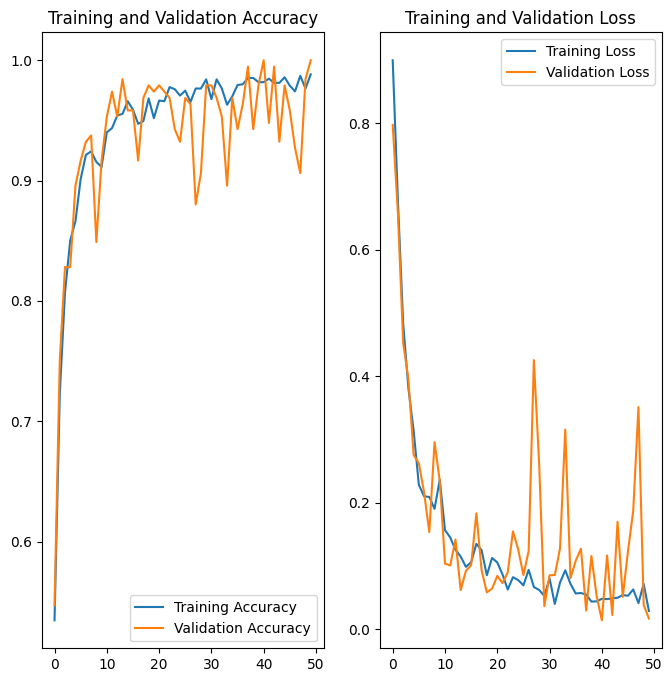

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Prediction(on test dataset)**

In [43]:
#just for 1 batch
for image_batch, label_batch in test_ds.take(1):
  print(image_batch[0].numpy().astype("uint8"))

[[[128 107 106]
  [142 121 120]
  [141 120 119]
  ...
  [124  98  97]
  [116  90  89]
  [116  90  89]]

 [[147 126 125]
  [145 124 123]
  [130 109 108]
  ...
  [142 116 115]
  [118  92  91]
  [ 99  73  72]]

 [[144 123 122]
  [148 127 126]
  [143 122 121]
  ...
  [169 143 142]
  [157 131 130]
  [133 107 106]]

 ...

 [[160 146 145]
  [163 149 148]
  [158 144 143]
  ...
  [198 187 183]
  [197 186 182]
  [201 190 186]]

 [[160 146 145]
  [161 147 146]
  [156 142 141]
  ...
  [192 181 177]
  [194 183 179]
  [200 189 185]]

 [[159 145 144]
  [159 145 144]
  [154 140 139]
  ...
  [182 171 167]
  [190 179 175]
  [202 191 187]]]


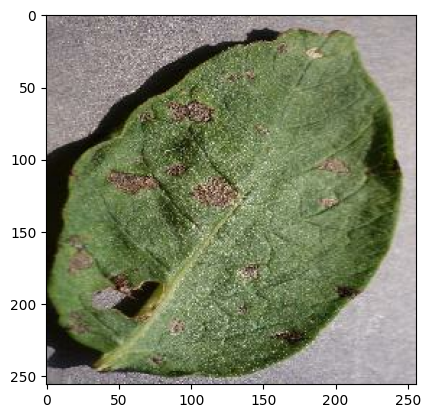

In [44]:
for image_batch, label_batch in test_ds.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

=>batch_prediction will give us probability of 3 classes as we have model architecture as 3 neurons and activation is softmax(it's a probability) among them highest probability is our actual class that class index can be obtained using numpy argmax function

first image to predict
actual label :  Potato___Late_blight
1/1 [==============================] - 0s 54ms/step
predicted label :  Potato___Late_blight


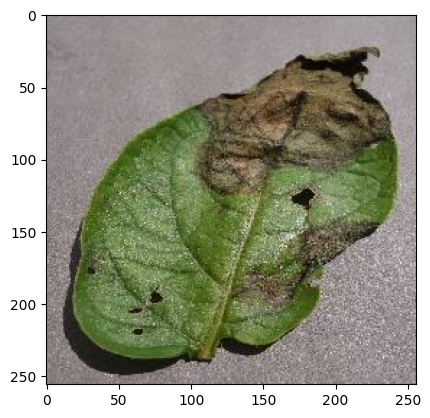

In [53]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype("uint8")
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label : ",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label : ",class_names[np.argmax(batch_prediction[0])])

=>The below function will take model and image as an input and gives predicted class and confidence as an output

=>100% confidence => accuracy of prediction is 100%

In [54]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #convert image into image array
  img_array = tf.expand_dims(img_array, 0) #create a batch out of it

  predictions = model.predict(img_array)  #call predict function

  predicted_class = class_names[np.argmax(predictions[0])] #find predicted class
  confidence = round(100* (np.max(predictions[0])),2) #find confidence
  return predicted_class, confidence

=> Running above predict function on batch

1/1 [==============================] - 0s 30ms/step


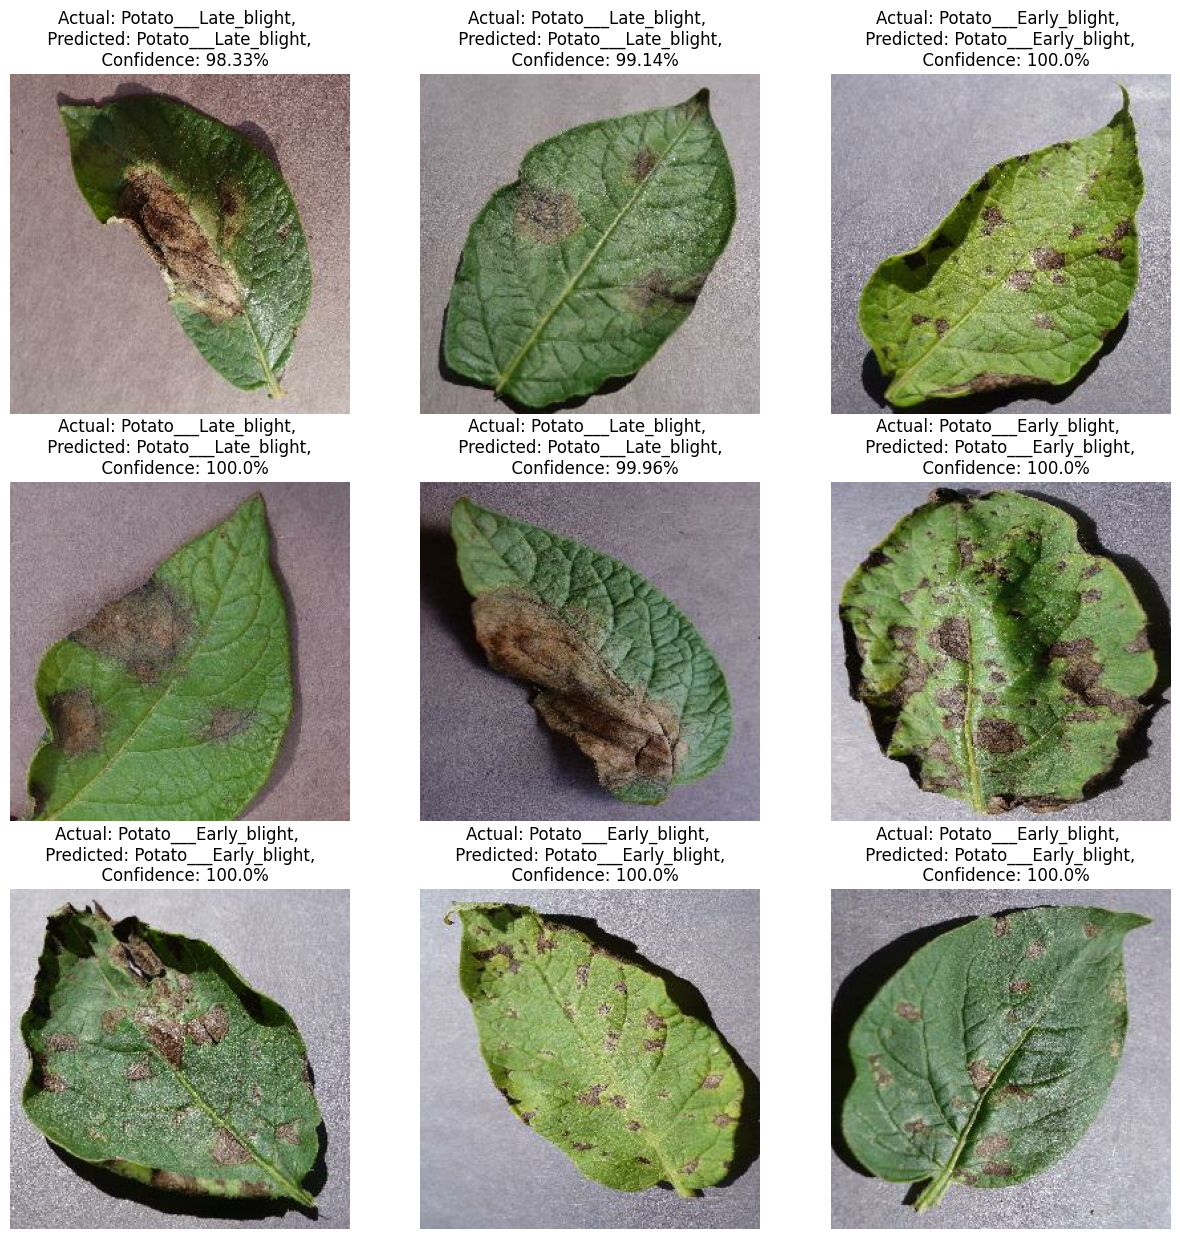

In [60]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    #predicted class and confidence
    predicted_class, confidence = predict(model, images[i].numpy()) #call predict function with model, image as parameters
    #actual class
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n  Confidence: {confidence}%")

    plt.axis("off")